# Step-1: Choose a binary classification dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load dataset
data=pd.read_csv(r"C:\Users\venka\Downloads\data (1).csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [16]:
data = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

x=data.drop('diagnosis',axis=1)
# target variable
y=data['diagnosis'].map({'M':1,'B':0})
print(x.shape,y.shape)

(569, 30) (569,)


In [19]:
# It will print top 5 rows of the dataset
print(x.head())

   radius_mean  texture_mean  perimeter_mean  ...  concave points_worst  symmetry_worst  fractal_dimension_worst
0        17.99         10.38          122.80  ...                0.2654          0.4601                  0.11890
1        20.57         17.77          132.90  ...                0.1860          0.2750                  0.08902
2        19.69         21.25          130.00  ...                0.2430          0.3613                  0.08758
3        11.42         20.38           77.58  ...                0.2575          0.6638                  0.17300
4        20.29         14.34          135.10  ...                0.1625          0.2364                  0.07678

[5 rows x 30 columns]


In [20]:
# It will print bottom 5 rows of the dataset
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


# Step-2: Train/test split and standardize features.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Standardize features
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# Check shapes
print("x_train_scaled:", x_train_scaled.shape)
print("x_test_scaled:", x_test_scaled.shape)


x_train_scaled: (455, 30)
x_test_scaled: (114, 30)


# Step-3: Fit a Logistic Regression model

In [41]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42)

#Fit model on training data
model.fit(x_train_scaled,y_train)

# Predict probability on test set
y_pred_prob = model.predict_proba(x_test_scaled)[:, 1] 

#predict class labels using default threshold 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Check first 10 predictions
print("Predicted probabilities:",y_pred_prob[:10])
print("Predicted probabilities:",y_pred[:10])
 


Predicted probabilities: [1.47148747e-01 9.98480496e-01 9.76891794e-01 4.78220000e-03
 6.45653804e-04 9.99999936e-01 9.99993916e-01 7.90295404e-01
 5.96581193e-01 1.03736318e-02]
Predicted probabilities: [0 1 1 0 0 1 1 1 1 0]


# Step-4: Evaluate with confusion matrix, precision, reca l, ROC-AUC

Confusion Matrix:
 [[285   5]
 [  6 160]]
Precision: 0.9696969696969697
Recall: 0.963855421686747
ROC-AUC: 0.9906938097216451


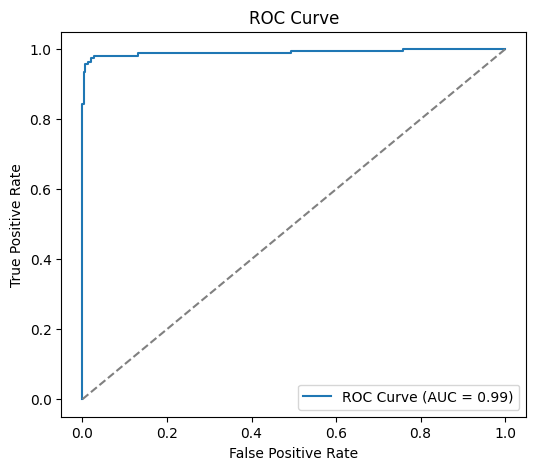

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

#Precision & Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)


# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Step-5: Tune threshold and explain sigmoid function

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix,precision_score,recall_score

#Tune threshold
threshold=0.4
y_pred_new=(y_pred_prob >= threshold).astype(int)

# Confusion matrix and metrices
cm_new=confusion_matrix(y_test,y_pred_new)
precision_new=precision_score(y_test,y_pred_new)
recall_new=recall_score(y_test,y_pred_new)

print(f"Threshold:{threshold}")
print("Confusion Matrix:\n", cm_new)
print("Precision:", precision_new)
print("Recall:", recall_new)

Threshold:0.4
Confusion Matrix:
 [[283   7]
 [  4 162]]
Precision: 0.9585798816568047
Recall: 0.9759036144578314
